# CIFAR-10 Image Classification: Custom CNN vs AlexNet

## Project Overview
This notebook implements and compares two approaches for CIFAR-10 image classification:
1. Custom CNN architecture
2. AlexNet architecture adapted for CIFAR-10

### Dataset: CIFAR-10
- 60,000 32x32 color images in 10 classes
- 50,000 training images and 10,000 test images
- Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import time

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

2025-07-25 18:21:46.271918: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-25 18:21:46.438359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753467706.535253    1137 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753467706.559253    1137 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753467706.702661    1137 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(class_names)}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 10


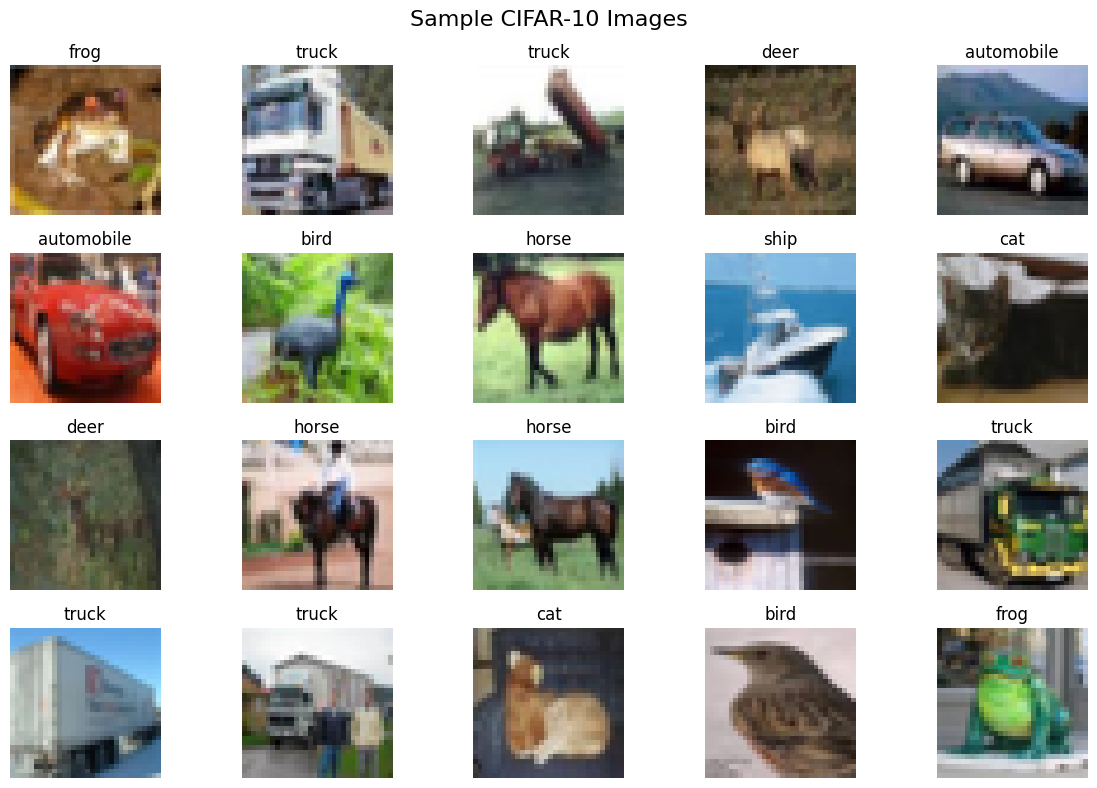

In [3]:
# Visualize sample images from CIFAR-10
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'{class_names[y_train[i][0]]}')
    plt.axis('off')
plt.suptitle('Sample CIFAR-10 Images', fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
# Data preprocessing
# Normalize pixel values to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"Normalized training data range: [{x_train_normalized.min():.2f}, {x_train_normalized.max():.2f}]")
print(f"Label shape after one-hot encoding: {y_train_categorical.shape}")

Normalized training data range: [0.00, 1.00]
Label shape after one-hot encoding: (50000, 10)


## Model 1: Custom CNN Architecture

In [5]:
def create_custom_cnn():
    """
    Create a custom CNN architecture optimized for CIFAR-10
    """
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

# Create and compile custom CNN
custom_cnn = create_custom_cnn()
custom_cnn.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

print("Custom CNN Architecture:")
custom_cnn.summary()

/home/dynamite/miniconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753467755.388846    1137 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Custom CNN Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,472,938 (5.62 MB)

 Trainable params: 1,471,466 (5.61 MB)

 Non-trainable params: 1,472 (5.75 KB)

## Model 2: AlexNet Architecture (Adapted for CIFAR-10)

In [6]:
def create_alexnet_cifar10():
    """
    Create AlexNet architecture adapted for CIFAR-10 (32x32 input)
    Original AlexNet was designed for 224x224 images, so we adapt it for smaller CIFAR-10 images
    """
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(96, (5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        
        # Second Convolutional Layer
        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        
        # Third Convolutional Layer
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Fourth Convolutional Layer
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Fifth Convolutional Layer
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        
        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

# Create and compile AlexNet
alexnet_model = create_alexnet_cifar10()
alexnet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

print("AlexNet Architecture (Adapted for CIFAR-10):")
alexnet_model.summary()

AlexNet Architecture (Adapted for CIFAR-10):


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 96)     │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,324,554 (142.38 MB)

 Trainable params: 37,323,850 (142.38 MB)

 Non-trainable params: 704 (2.75 KB)

## Training Configuration and Callbacks

In [7]:
# Training configuration
EPOCHS = 50
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.1

# Create callbacks for better training
def create_callbacks(model_name):
    return [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=0.0001
        ),
        keras.callbacks.ModelCheckpoint(
            f'best_{model_name}_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

## Training Custom CNN

In [ ]:
print("Training Custom CNN...")
start_time = time.time()

# Train custom CNN
custom_cnn_history = custom_cnn.fit(
    x_train_normalized, y_train_categorical,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks=create_callbacks('custom_cnn'),
    verbose=1
)

custom_cnn_training_time = time.time() - start_time
print(f"Custom CNN training completed in {custom_cnn_training_time:.2f} seconds")

Training Custom CNN...
Epoch 1/50


I0000 00:00:1753467760.985791    1386 service.cc:152] XLA service 0x7640e0009660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753467760.985842    1386 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-07-25 18:22:41.078457: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753467761.857791    1386 cuda_dnn.cc:529] Loaded cuDNN version 90300


  7/352 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.1000 - loss: 3.7219   

I0000 00:00:1753467770.785544    1386 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


349/352 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2652 - loss: 2.3705

2025-07-25 18:22:58.711245: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3803', 60 bytes spill stores, 60 bytes spill loads



352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2658 - loss: 2.3667

2025-07-25 18:23:05.188223: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_207', 4 bytes spill stores, 4 bytes spill loads

2025-07-25 18:23:05.454157: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_207', 4 bytes spill stores, 4 bytes spill loads




Epoch 1: val_accuracy improved from -inf to 0.20400, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.2661 - loss: 2.3655 - val_accuracy: 0.2040 - val_loss: 2.4876 - learning_rate: 0.0010
Epoch 2/50
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4753 - loss: 1.4446
Epoch 2: val_accuracy improved from 0.20400 to 0.57020, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4754 - loss: 1.4441 - val_accuracy: 0.5702 - val_loss: 1.1826 - learning_rate: 0.0010
Epoch 3/50
349/352 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5905 - loss: 1.1526
Epoch 3: val_accuracy improved from 0.57020 to 0.66240, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5906 - loss: 1.1520 - val_accuracy: 0.6624 - val_loss: 0.9389 - learning_rate: 0.0010
Epoch 4/50
349/352 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6480 - loss: 0.9914
Epoch 4: val_accuracy improved from 0.66240 to 0.69180, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6482 - loss: 0.9911 - val_accuracy: 0.6918 - val_loss: 0.8678 - learning_rate: 0.0010
Epoch 5/50
349/352 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6898 - loss: 0.8812
Epoch 5: val_accuracy improved from 0.69180 to 0.75720, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6899 - loss: 0.8810 - val_accuracy: 0.7572 - val_loss: 0.6737 - learning_rate: 0.0010
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7165 - loss: 0.8032
Epoch 6: val_accuracy improved from 0.75720 to 0.76680, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7165 - loss: 0.8032 - val_accuracy: 0.7668 - val_loss: 0.6630 - learning_rate: 0.0010
Epoch 7/50
349/352 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7372 - loss: 0.7563
Epoch 7: val_accuracy improved from 0.76680 to 0.77160, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7373 - loss: 0.7561 - val_accuracy: 0.7716 - val_loss: 0.6531 - learning_rate: 0.0010
Epoch 8/50
350/352 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7563 - loss: 0.6948
Epoch 8: val_accuracy improved from 0.77160 to 0.78800, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7563 - loss: 0.6946 - val_accuracy: 0.7880 - val_loss: 0.6202 - learning_rate: 0.0010
Epoch 9/50
349/352 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7710 - loss: 0.6588
Epoch 9: val_accuracy did not improve from 0.78800
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7710 - loss: 0.6586 - val_accuracy: 0.7746 - val_loss: 0.6884 - learning_rate: 0.0010
Epoch 10/50
350/352 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7853 - loss: 0.6189

## Training AlexNet

In [ ]:
print("Training AlexNet...")
start_time = time.time()

# Train AlexNet
alexnet_history = alexnet_model.fit(
    x_train_normalized, y_train_categorical,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks=create_callbacks('alexnet'),
    verbose=1
)

alexnet_training_time = time.time() - start_time
print(f"AlexNet training completed in {alexnet_training_time:.2f} seconds")

## Model Evaluation and Testing

In [ ]:
# Evaluate both models on test set
print("Evaluating Custom CNN on test set...")
custom_cnn_test_loss, custom_cnn_test_accuracy = custom_cnn.evaluate(
    x_test_normalized, y_test_categorical, verbose=0
)

print("Evaluating AlexNet on test set...")
alexnet_test_loss, alexnet_test_accuracy = alexnet_model.evaluate(
    x_test_normalized, y_test_categorical, verbose=0
)

# Generate predictions for detailed analysis
custom_cnn_predictions = custom_cnn.predict(x_test_normalized)
alexnet_predictions = alexnet_model.predict(x_test_normalized)

custom_cnn_pred_classes = np.argmax(custom_cnn_predictions, axis=1)
alexnet_pred_classes = np.argmax(alexnet_predictions, axis=1)
true_classes = np.argmax(y_test_categorical, axis=1)

print(f"\nTest Results:")
print(f"Custom CNN - Test Accuracy: {custom_cnn_test_accuracy:.4f} ({custom_cnn_test_accuracy*100:.2f}%)")
print(f"AlexNet - Test Accuracy: {alexnet_test_accuracy:.4f} ({alexnet_test_accuracy*100:.2f}%)")

## Training History Visualization

In [ ]:
# Plot training history
def plot_training_history(custom_history, alexnet_history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy plots
    axes[0, 0].plot(custom_history.history['accuracy'], label='Custom CNN Train', color='blue')
    axes[0, 0].plot(custom_history.history['val_accuracy'], label='Custom CNN Val', color='lightblue')
    axes[0, 0].set_title('Custom CNN - Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    axes[0, 1].plot(alexnet_history.history['accuracy'], label='AlexNet Train', color='red')
    axes[0, 1].plot(alexnet_history.history['val_accuracy'], label='AlexNet Val', color='lightcoral')
    axes[0, 1].set_title('AlexNet - Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Loss plots
    axes[1, 0].plot(custom_history.history['loss'], label='Custom CNN Train', color='blue')
    axes[1, 0].plot(custom_history.history['val_loss'], label='Custom CNN Val', color='lightblue')
    axes[1, 0].set_title('Custom CNN - Loss')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    axes[1, 1].plot(alexnet_history.history['loss'], label='AlexNet Train', color='red')
    axes[1, 1].plot(alexnet_history.history['val_loss'], label='AlexNet Val', color='lightcoral')
    axes[1, 1].set_title('AlexNet - Loss')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Loss')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_history(custom_cnn_history, alexnet_history)

## Comparative Analysis

In [ ]:
# Comparative accuracy plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
epochs_range = range(1, len(custom_cnn_history.history['accuracy']) + 1)
plt.plot(epochs_range, custom_cnn_history.history['accuracy'], 'b-', label='Custom CNN Train')
plt.plot(epochs_range, custom_cnn_history.history['val_accuracy'], 'b--', label='Custom CNN Val')

epochs_range_alex = range(1, len(alexnet_history.history['accuracy']) + 1)
plt.plot(epochs_range_alex, alexnet_history.history['accuracy'], 'r-', label='AlexNet Train')
plt.plot(epochs_range_alex, alexnet_history.history['val_accuracy'], 'r--', label='AlexNet Val')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
models = ['Custom CNN', 'AlexNet']
test_accuracies = [custom_cnn_test_accuracy, alexnet_test_accuracy]
colors = ['blue', 'red']

bars = plt.bar(models, test_accuracies, color=colors, alpha=0.7)
plt.title('Test Accuracy Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Confusion Matrix and Classification Reports

In [ ]:
# Generate classification reports
print("Classification Report - Custom CNN:")
print(classification_report(true_classes, custom_cnn_pred_classes, target_names=class_names))

print("\nClassification Report - AlexNet:")
print(classification_report(true_classes, alexnet_pred_classes, target_names=class_names))

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Custom CNN confusion matrix
cm_custom = confusion_matrix(true_classes, custom_cnn_pred_classes)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title(f'Custom CNN Confusion Matrix\nTest Accuracy: {custom_cnn_test_accuracy:.3f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# AlexNet confusion matrix
cm_alexnet = confusion_matrix(true_classes, alexnet_pred_classes)
sns.heatmap(cm_alexnet, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title(f'AlexNet Confusion Matrix\nTest Accuracy: {alexnet_test_accuracy:.3f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Model Complexity Analysis

In [ ]:
# Calculate model parameters and complexity
def count_parameters(model):
    return model.count_params()

custom_cnn_params = count_parameters(custom_cnn)
alexnet_params = count_parameters(alexnet_model)

print("Model Complexity Analysis:")
print(f"Custom CNN:")
print(f"  - Total Parameters: {custom_cnn_params:,}")
print(f"  - Training Time: {custom_cnn_training_time:.2f} seconds")
print(f"  - Test Accuracy: {custom_cnn_test_accuracy:.4f}")

print(f"\nAlexNet:")
print(f"  - Total Parameters: {alexnet_params:,}")
print(f"  - Training Time: {alexnet_training_time:.2f} seconds")
print(f"  - Test Accuracy: {alexnet_test_accuracy:.4f}")

print(f"\nParameter Ratio: AlexNet has {alexnet_params/custom_cnn_params:.1f}x more parameters than Custom CNN")

## Sample Predictions Visualization

In [ ]:
# Visualize some predictions
def plot_predictions(images, true_labels, custom_predictions, alexnet_predictions, class_names, num_samples=12):
    plt.figure(figsize=(15, 10))
    
    for i in range(num_samples):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        
        true_class = class_names[true_labels[i]]
        custom_pred_class = class_names[custom_predictions[i]]
        alexnet_pred_class = class_names[alexnet_predictions[i]]
        
        # Color code: green if both correct, red if both wrong, yellow if mixed
        custom_correct = custom_predictions[i] == true_labels[i]
        alexnet_correct = alexnet_predictions[i] == true_labels[i]
        
        if custom_correct and alexnet_correct:
            color = 'green'
        elif not custom_correct and not alexnet_correct:
            color = 'red'
        else:
            color = 'orange'
        
        plt.title(f'True: {true_class}\nCustom: {custom_pred_class}\nAlexNet: {alexnet_pred_class}', 
                 fontsize=8, color=color)
        plt.axis('off')
    
    plt.suptitle('Sample Predictions Comparison\n(Green: Both Correct, Red: Both Wrong, Orange: Mixed)', 
                fontsize=12)
    plt.tight_layout()
    plt.show()

# Show some random predictions
random_indices = np.random.choice(len(x_test), 12, replace=False)
plot_predictions(x_test[random_indices], true_classes[random_indices], 
                custom_cnn_pred_classes[random_indices], alexnet_pred_classes[random_indices], 
                class_names)

## Final Performance Summary and Analysis

In [ ]:
print("="*80)
print("CIFAR-10 CLASSIFICATION - FINAL PERFORMANCE SUMMARY")
print("="*80)

print(f"\n📊 TEST ACCURACY RESULTS:")
print(f"Custom CNN:  {custom_cnn_test_accuracy:.4f} ({custom_cnn_test_accuracy*100:.2f}%)")
print(f"AlexNet:     {alexnet_test_accuracy:.4f} ({alexnet_test_accuracy*100:.2f}%)")

if custom_cnn_test_accuracy > alexnet_test_accuracy:
    winner = "Custom CNN"
    difference = custom_cnn_test_accuracy - alexnet_test_accuracy
else:
    winner = "AlexNet"
    difference = alexnet_test_accuracy - custom_cnn_test_accuracy

print(f"\n🏆 WINNER: {winner} (by {difference*100:.2f} percentage points)")

print(f"\n⚙️ MODEL COMPLEXITY:")
print(f"Custom CNN Parameters:  {custom_cnn_params:,}")
print(f"AlexNet Parameters:     {alexnet_params:,}")
print(f"Parameter Ratio:        {alexnet_params/custom_cnn_params:.1f}x")

print(f"\n⏱️ TRAINING TIME:")
print(f"Custom CNN:  {custom_cnn_training_time:.2f} seconds")
print(f"AlexNet:     {alexnet_training_time:.2f} seconds")

print(f"\n📈 OBSERVATIONS AND ANALYSIS:")
print(f"\n1. ACCURACY COMPARISON:")
if custom_cnn_test_accuracy > alexnet_test_accuracy:
    print(f"   • Custom CNN outperformed AlexNet by {difference*100:.2f}%")
    print(f"   • This suggests that the custom architecture is better suited for CIFAR-10")
else:
    print(f"   • AlexNet outperformed Custom CNN by {difference*100:.2f}%")
    print(f"   • This demonstrates the power of the proven AlexNet architecture")

print(f"\n2. MODEL EFFICIENCY:")
custom_efficiency = custom_cnn_test_accuracy / (custom_cnn_params / 1000000)
alexnet_efficiency = alexnet_test_accuracy / (alexnet_params / 1000000)
print(f"   • Custom CNN Efficiency: {custom_efficiency:.3f} (accuracy per million parameters)")
print(f"   • AlexNet Efficiency: {alexnet_efficiency:.3f} (accuracy per million parameters)")

if custom_efficiency > alexnet_efficiency:
    print(f"   • Custom CNN is more parameter-efficient")
else:
    print(f"   • AlexNet achieves better accuracy despite having more parameters")

print(f"\n3. ARCHITECTURE INSIGHTS:")
print(f"   • Custom CNN uses modern techniques: Batch Normalization, Dropout")
print(f"   • AlexNet adapted from 224x224 to 32x32 input size")
print(f"   • Both models benefit from data normalization and proper regularization")

print(f"\n4. PRACTICAL CONSIDERATIONS:")
if custom_cnn_training_time < alexnet_training_time:
    print(f"   • Custom CNN trains {alexnet_training_time/custom_cnn_training_time:.1f}x faster")
else:
    print(f"   • AlexNet trains {custom_cnn_training_time/alexnet_training_time:.1f}x faster")
print(f"   • Model size affects deployment and inference speed")
print(f"   • Custom architectures can be optimized for specific datasets")

print(f"\n" + "="*80)
print(f"CONCLUSION: The {winner} model provides the best performance for CIFAR-10 classification")
print(f"in terms of test accuracy, achieving {max(custom_cnn_test_accuracy, alexnet_test_accuracy)*100:.2f}% accuracy.")
print("="*80)